In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
from pandas import set_option
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display_html
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['patch.facecolor'] = 'b'

# rainbow colors
rb = []
colors = plt.cm.rainbow(np.linspace(0,1,18))
for c in colors:
    rb.append(c)
rb = reversed(rb)
rb = list(rb)

# viridis colors
vd = []
colors = plt.cm.GnBu(np.linspace(0,1,6))
for c in colors:
    vd.append(c)
vd = list(vd)

In [9]:
file ='train.xlsx'
sales = pd.read_excel(file)
sales.info()
sales.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [12]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

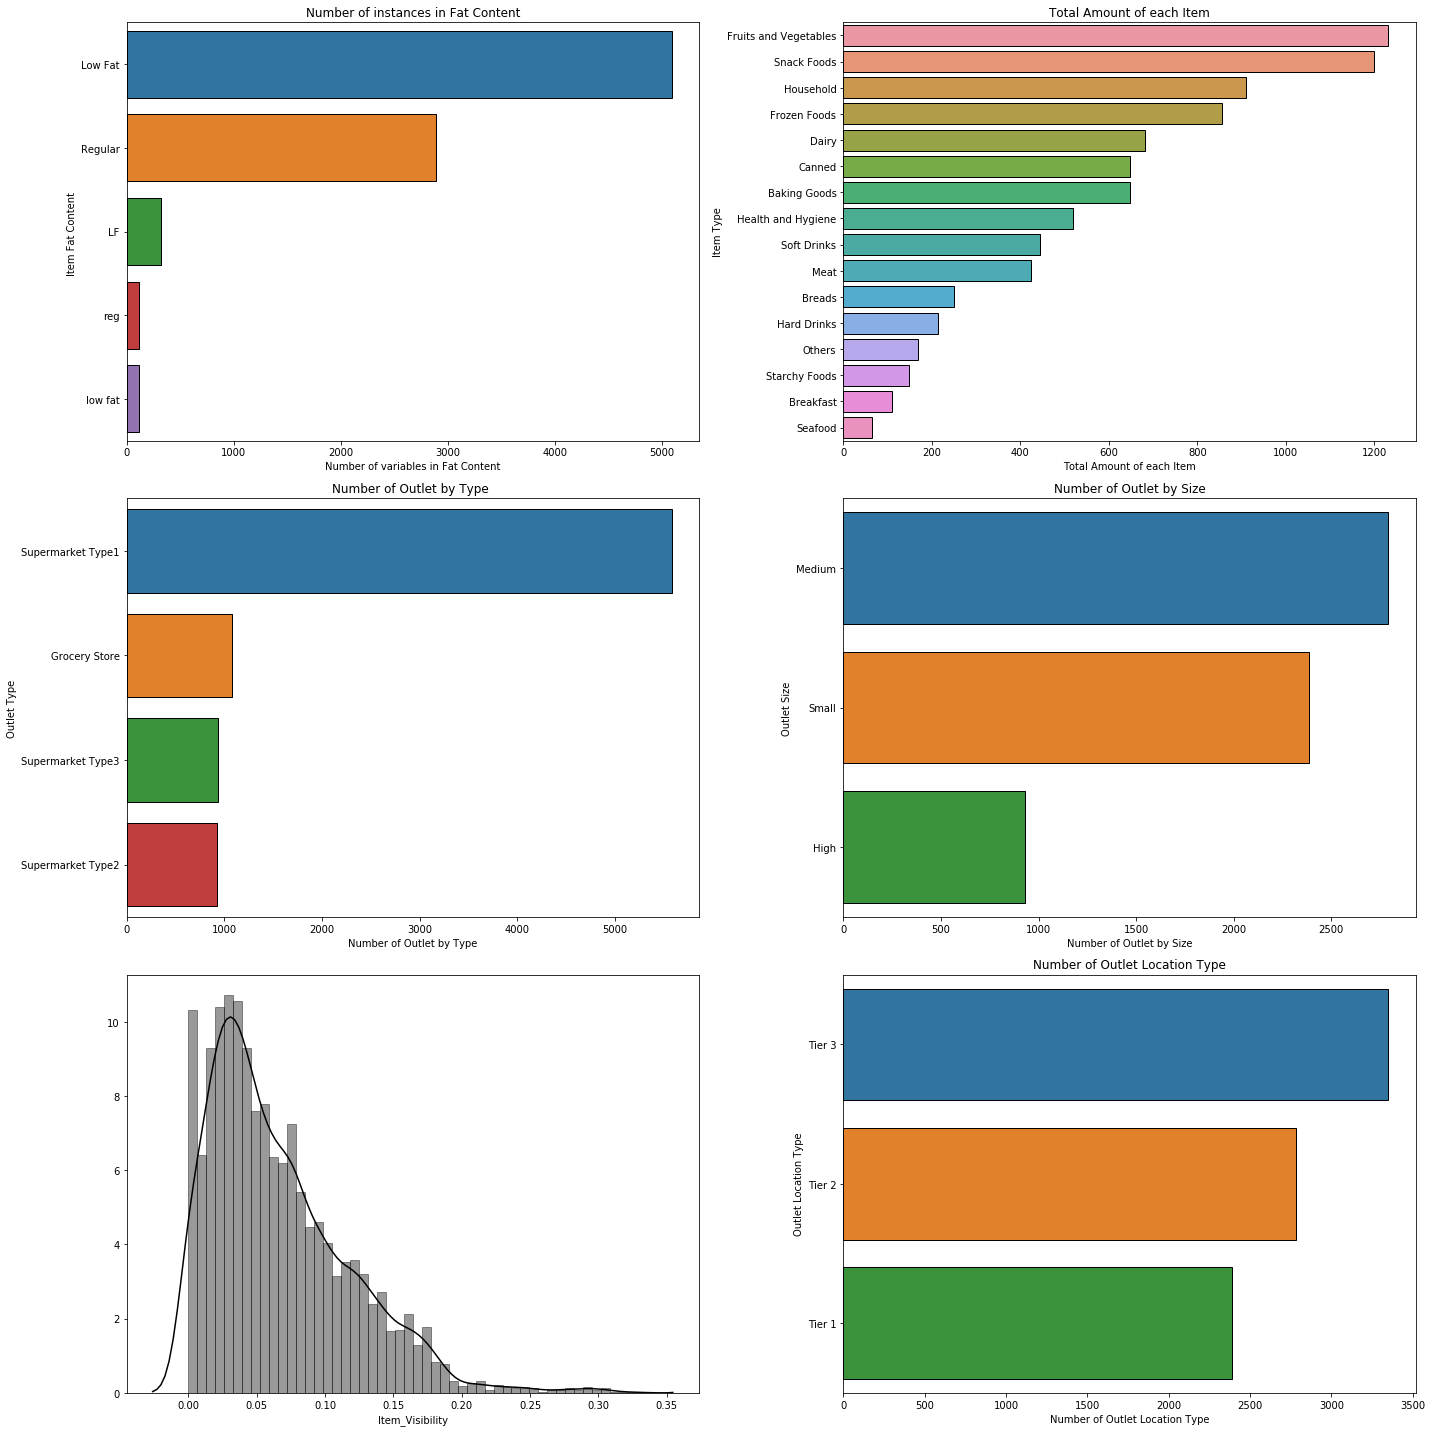

In [24]:
fig, ax = plt.subplots(3,2, figsize=(20,20))
sns.barplot(x='Item_Fat_Content', y='index', data = sales['Item_Fat_Content'].value_counts().reset_index(), ax=ax[0,0])
ax[0,0].set_title('Number of instances in Fat Content')
ax[0,0].set_ylabel('Item Fat Content ')
ax[0,0].set_xlabel('Number of variables in Fat Content')

sns.barplot(x='Item_Type', y='index', data = sales['Item_Type'].value_counts().reset_index(), ax=ax[0,1])
ax[0,1].set_title('Total Amount of each Item')
ax[0,1].set_ylabel('Item Type')
ax[0,1].set_xlabel('Total Amount of each Item')


sns.barplot(x='Outlet_Type', y='index', data = sales['Outlet_Type'].value_counts().reset_index(), ax=ax[1,0])
ax[1,0].set_title('Number of Outlet by Type ')
ax[1,0].set_ylabel('Outlet Type')
ax[1,0].set_xlabel('Number of Outlet by Type')


sns.barplot(x='Outlet_Size', y='index', data = sales['Outlet_Size'].value_counts().reset_index(), ax=ax[1,1])
ax[1,1].set_title('Number of Outlet by Size')
ax[1,1].set_ylabel('Outlet Size')
ax[1,1].set_xlabel('Number of Outlet by Size')


sns.distplot( sales["Item_Visibility"] , color="black", label="Item_Visibility",ax=ax[2,0])


sns.barplot(x='Outlet_Location_Type', y='index', data = sales['Outlet_Location_Type'].value_counts().reset_index(), ax=ax[2,1])
ax[2,1].set_title('Number of Outlet Location Type')
ax[2,1].set_ylabel('Outlet Location Type')
ax[2,1].set_xlabel('Number of Outlet Location Type')


plt.tight_layout()
plt.show()


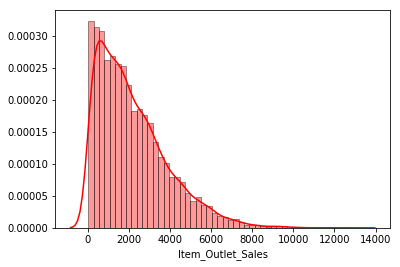

In [25]:
sns.distplot( sales["Item_Outlet_Sales"] , color="red", label="Sales")


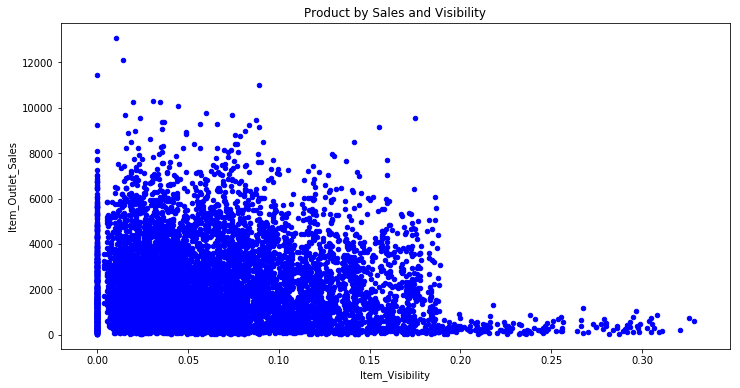

In [26]:
sales.plot.scatter(x='Item_Visibility', y='Item_Outlet_Sales',
                     figsize=(12, 6),
                     title='Product by Sales and Visibility')


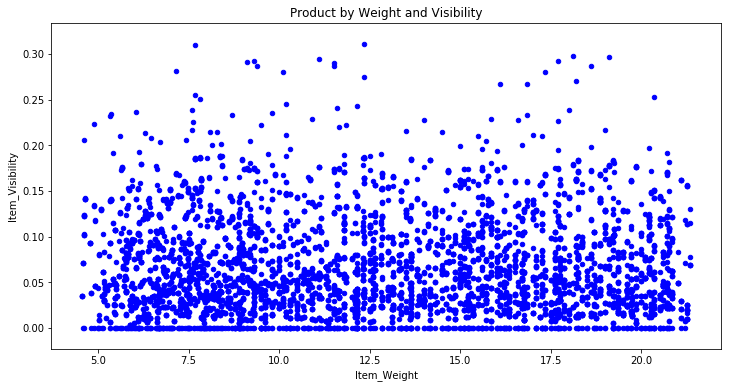

In [27]:
sales.plot.scatter(x='Item_Weight', y='Item_Visibility',
                     figsize=(12, 6),
                     title='Product by Weight and Visibility')

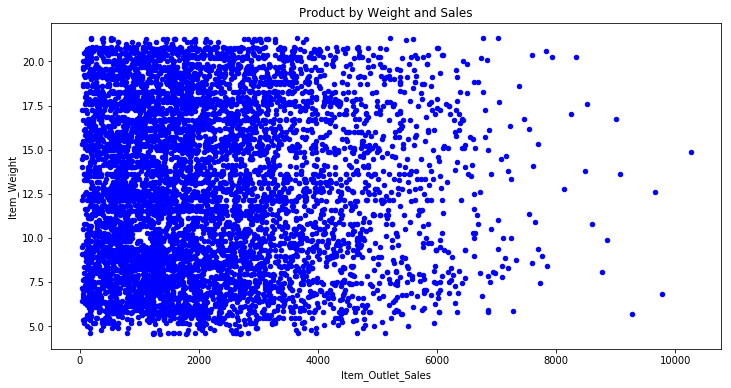

In [28]:
sales.plot.scatter(x='Item_Outlet_Sales', y='Item_Weight',
                     figsize=(12, 6),
                     title='Product by Weight and Sales')

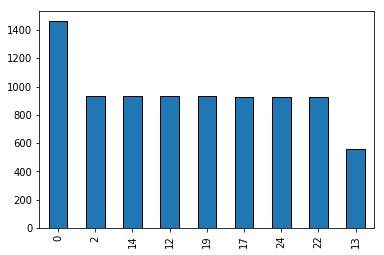

In [29]:
## creating new columns called percentage of sales ofr better visuals
sales['percentage_of_sales']= sales['Item_Outlet_Sales'] / sales['Item_Outlet_Sales'].sum()

### creating new columns called year of operation 

sales['Outlet_Establishment_Year'].value_counts
sales['year_of_operation'] = sales['Outlet_Establishment_Year'] - 1985

sales['year_of_operation'].value_counts().plot.bar()

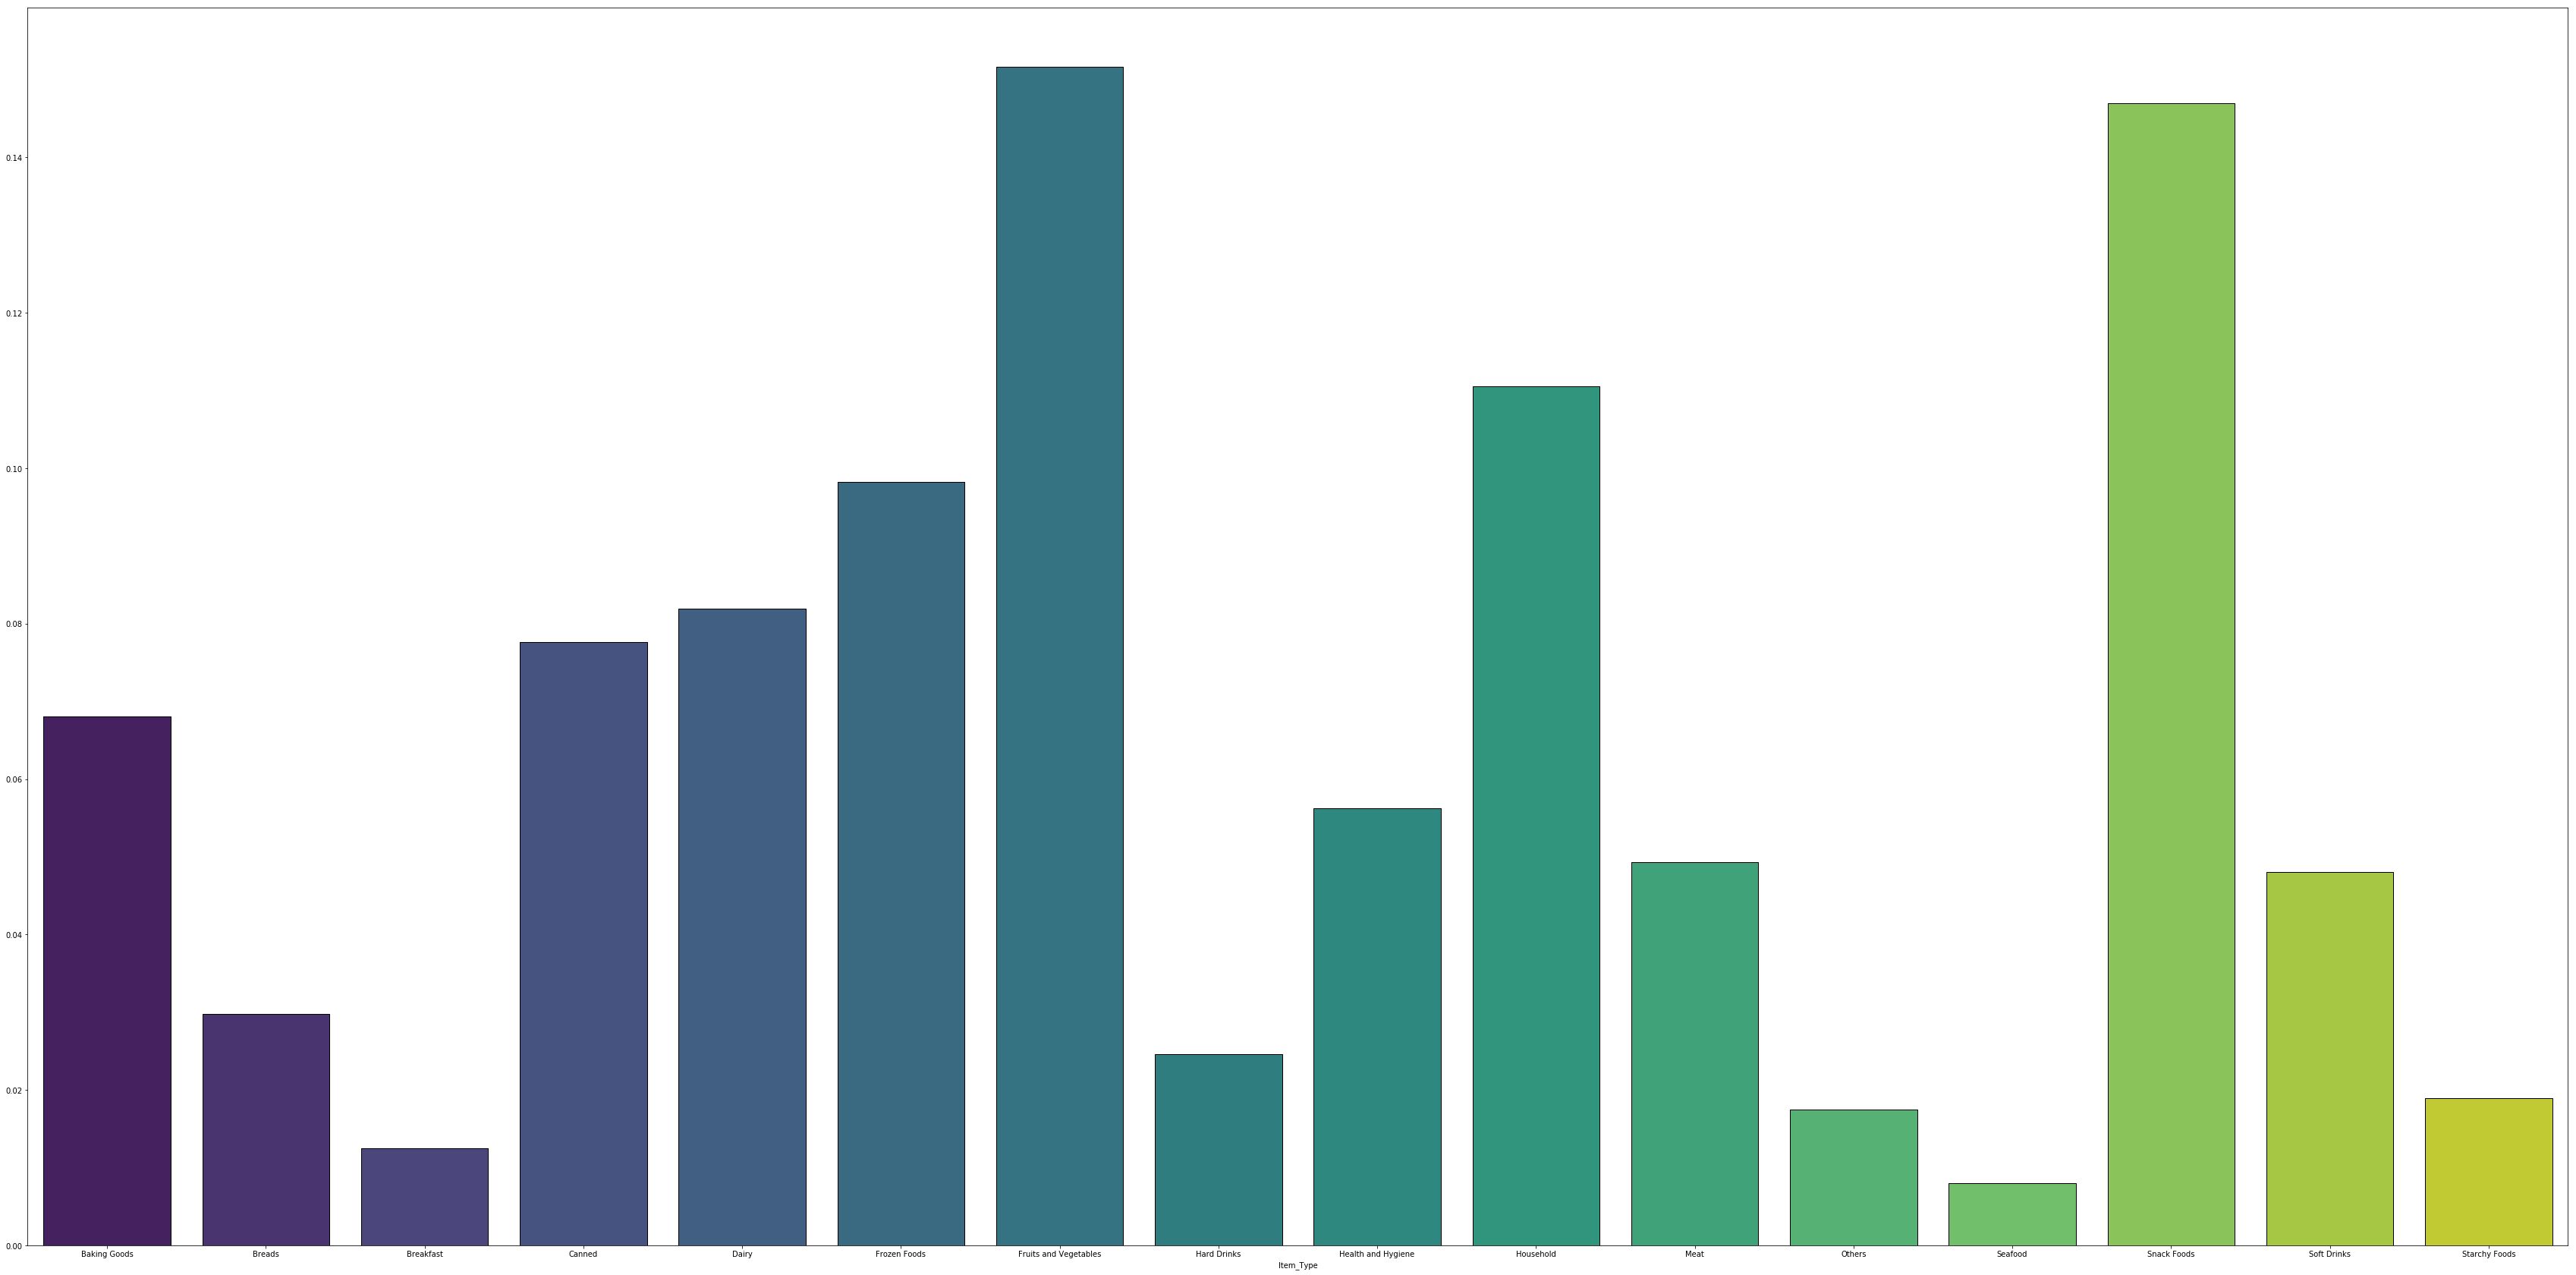

In [47]:
# Which products sold more? 
item_sales =  sales.groupby('Item_Type')['percentage_of_sales'].sum() # Preparing subset of data for chart
a= item_sales.index.map(lambda x: str(x))
b = item_sales.values

fig,ax = plt.subplots(figsize = (60,30))
sns.barplot(a,b, order=a, palette='viridis',ax=ax)




                       Item_Outlet_Sales  Item_MRP
Item_Type                                         
Baking Goods                1.265525e+06  112.3544
Breads                      5.532372e+05  129.1310
Breakfast                   2.322990e+05  155.3630
Canned                      1.444151e+06  140.1496
Dairy                       1.522594e+06  147.5405
Frozen Foods                1.825735e+06  128.6494
Fruits and Vegetables       2.820060e+06  145.5444
Hard Drinks                 4.577934e+05  144.9444
Health and Hygiene          1.045200e+06  128.0349
Household                   2.055494e+06  153.3182
Meat                        9.175656e+05  146.5734
Others                      3.255176e+05  130.9284
Seafood                     1.488682e+05  158.5604
Snack Foods                 2.732786e+06  146.6734
Soft Drinks                 8.928977e+05  144.0102
Starchy Foods               3.514013e+05  166.9342
                       Item_Outlet_Sales  Item_Visibility
Item_Type               

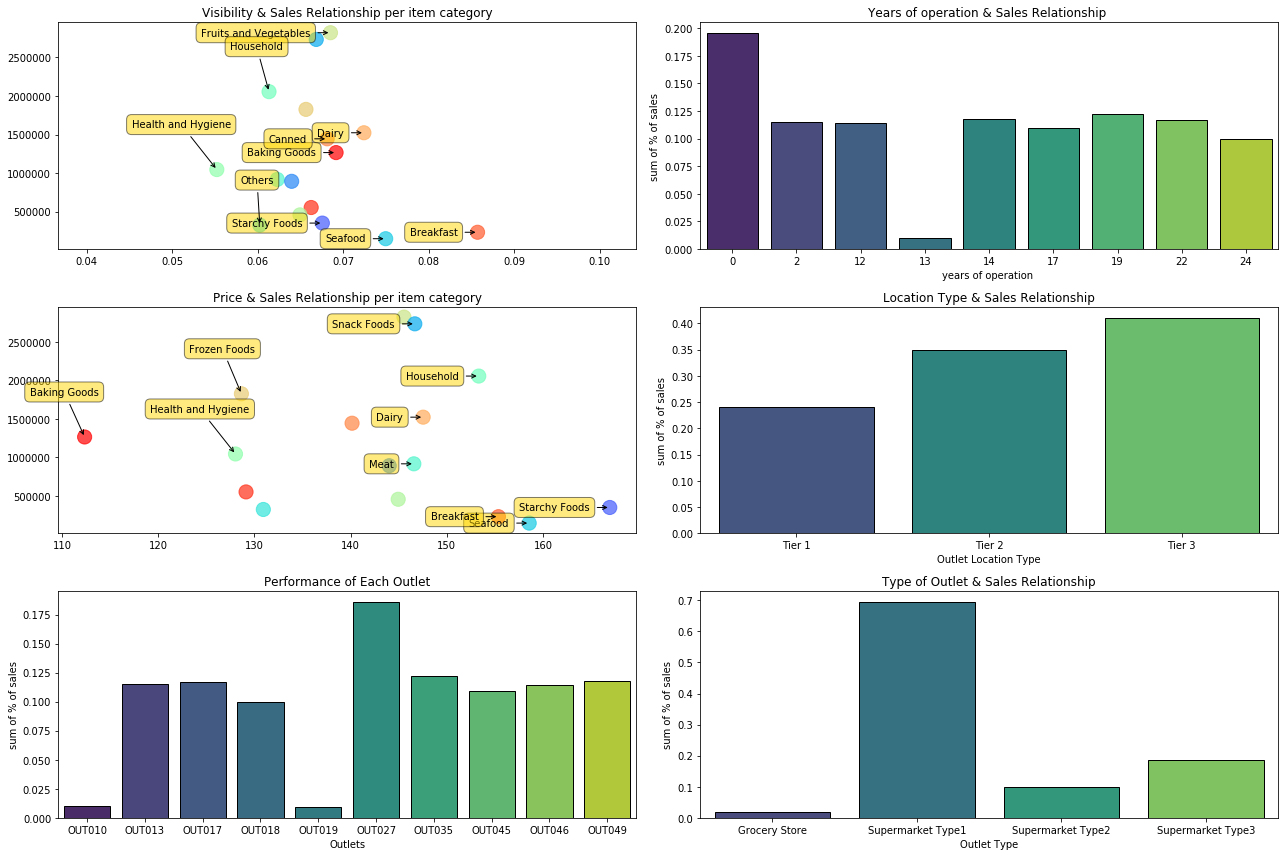

In [48]:
## price , sales, item type relationship 
fig, ax = plt.subplots(3,2, figsize=(18,12))

d = {'Item_Outlet_Sales':'Sum', 'Item_MRP':'Mean'}
df=sales.groupby('Item_Type').agg({'Item_Outlet_Sales':'sum', 'Item_MRP':'median'})
print (df)

labels_max = df.sort_values(by='Item_MRP', ascending=False).head(7) # find label for top 7 types for attack
labels_min = df.sort_values(by='Item_MRP', ascending=True).head(3) # find label for last 3 types for attack
label_high = labels_max.index.tolist()
label_low = labels_min.index.tolist()


ax[1,0].scatter(x=df['Item_MRP'], y=df['Item_Outlet_Sales'],s=200,label=df.index, c=rb, alpha=0.7)
for label, x, y in zip(label_high, labels_max['Item_MRP'], labels_max['Item_Outlet_Sales']):
    ax[1,0].annotate(
        label, xy=(x, y), xytext=(-20, -5), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
for label, a, b in zip(label_low, labels_min['Item_MRP'], labels_min['Item_Outlet_Sales']):
    ax[1,0].annotate(
        label, xy=(a, b), xytext=(14, 40), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[1,0].set_title('Price & Sales Relationship per item category')

###########################
f = {'Item_Outlet_Sales':'Sum', 'Item_Visibility':'Mean'}
df_1=sales.groupby('Item_Type').agg({'Item_Outlet_Sales':'sum', 'Item_Visibility':'mean'})
print (df_1)
labels_vis_max = df_1.sort_values(by='Item_Visibility', ascending=False).head(7) # find label for top 7 types for attack
labels_vis_min = df_1.sort_values(by='Item_Visibility', ascending=True).head(3) # find label for last 3 types for attack
label_vis_high = labels_vis_max.index.tolist()
label_vis_low = labels_vis_min.index.tolist()

ax[0,0].scatter(x=df_1['Item_Visibility'], y=df_1['Item_Outlet_Sales'],s=200,label=df_1.index, c=rb, alpha=0.7)
for label, x, y in zip(label_vis_high, labels_vis_max['Item_Visibility'], labels_vis_max['Item_Outlet_Sales']):
    ax[0,0].annotate(
        label, xy=(x, y), xytext=(-20, -5), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
for label, a, b in zip(label_vis_low, labels_vis_min['Item_Visibility'], labels_vis_min['Item_Outlet_Sales']):
    ax[0,0].annotate(
        label, xy=(a, b), xytext=(14, 40), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[0,0].set_title('Visibility & Sales Relationship per item category')

##################3
oper_sales = sales.groupby('year_of_operation')['percentage_of_sales'].sum() # Preparing subset of data for chart
x = oper_sales.index.map(lambda x: str(x))
y = oper_sales.values

sns.barplot(x,y, order=x, palette='viridis',ax=ax[0,1])
ax[0,1].set_xlabel('years of operation ')
ax[0,1].set_ylabel('sum of % of sales')
ax[0,1].set_title('Years of operation & Sales Relationship ')

######################

loctype_sales = sales.groupby('Outlet_Location_Type')['percentage_of_sales'].sum() # Preparing subset of data for chart
a = loctype_sales.index.map(lambda x: str(x))
b = loctype_sales.values

sns.barplot(a,b, order=a, palette='viridis',ax=ax[1,1])
ax[1,1].set_xlabel('Outlet Location Type')
ax[1,1].set_ylabel('sum of % of sales')
ax[1,1].set_title('Location Type & Sales Relationship')

outlet_type_sales = sales.groupby('Outlet_Type')['percentage_of_sales'].sum() # Preparing subset of data for chart
c= outlet_type_sales.index.map(lambda x: str(x))
d = outlet_type_sales.values
sns.barplot(c,d, order=c, palette='viridis',ax=ax[2,1])
ax[2,1].set_xlabel('Outlet Type')
ax[2,1].set_ylabel('sum of % of sales')
ax[2,1].set_title('Type of Outlet & Sales Relationship')


outlet_type_sales = sales.groupby('Outlet_Identifier')['percentage_of_sales'].sum() # Preparing subset of data for chart
e= outlet_type_sales.index.map(lambda x: str(x))
f = outlet_type_sales.values
sns.barplot(e,f, order=e, palette='viridis',ax=ax[2,0])
ax[2,0].set_xlabel('Outlets')
ax[2,0].set_ylabel('sum of % of sales')
ax[2,0].set_title('Performance of Each Outlet')



plt.tight_layout()
plt.show()



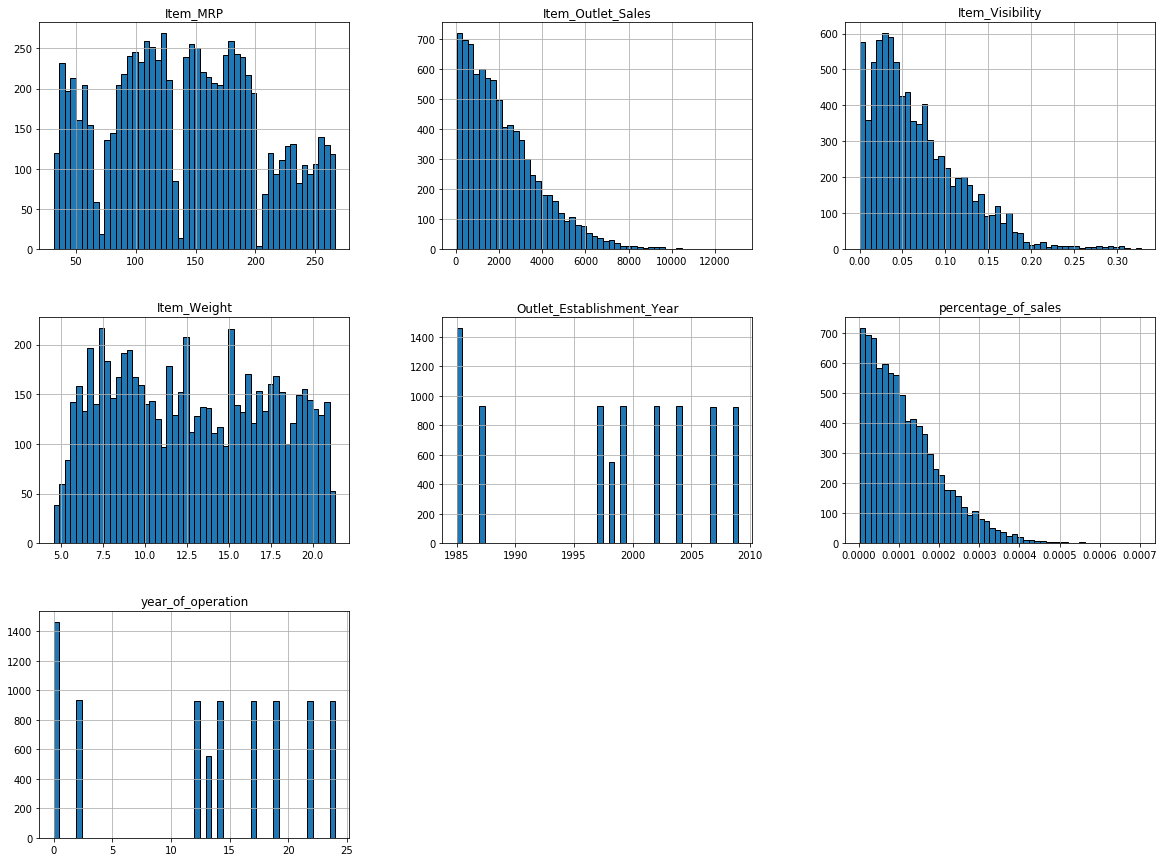

In [49]:
sales.hist(bins=50, figsize=(20,15))
plt.show()


In [52]:
corr_matrix = sales.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
percentage_of_sales          1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
year_of_operation           -0.049135
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

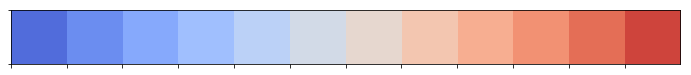

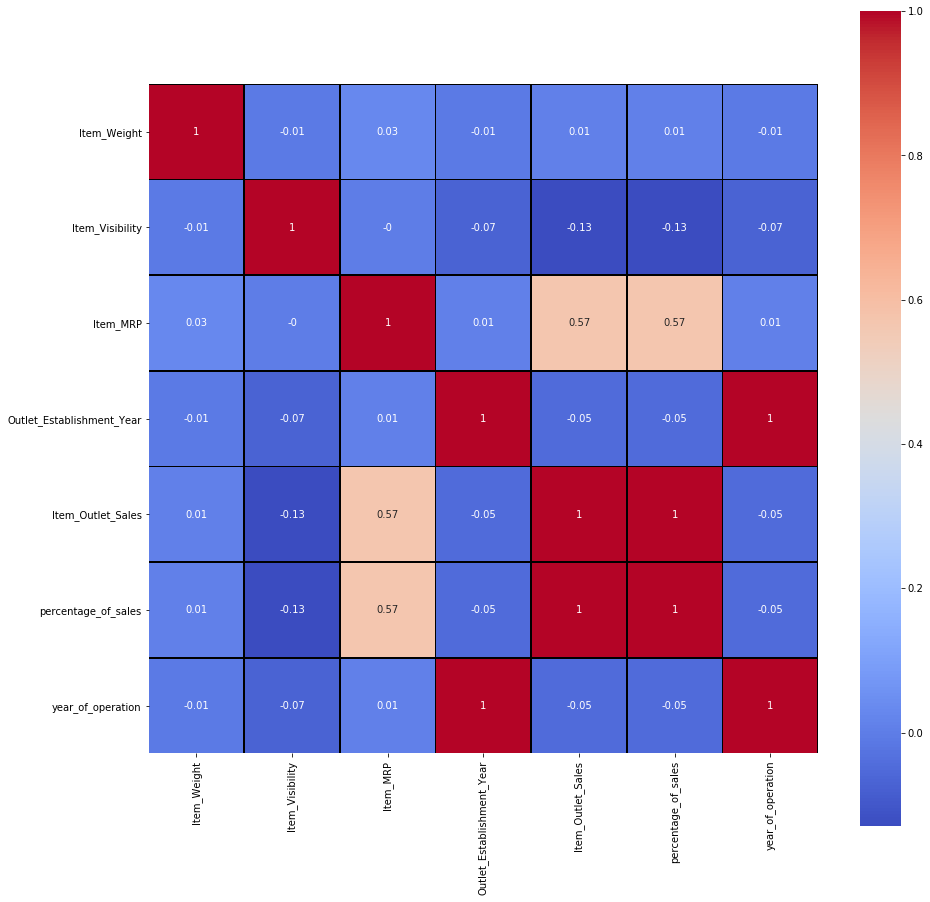

In [53]:
df_corr = sales.corr().round(2)
sns.palplot(sns.color_palette('coolwarm', 12))
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)
plt.show()
